In [65]:
%run ../collect.py --root_dir=/Users/yangjunjie/work/fftisdf-for-dmet/fftisdf-with-dmet-main/benchmark/klno/co2 --filename=out.log --output=../data/co2-klno.json
%run ../collect.py --root_dir=/Users/yangjunjie/work/fftisdf-for-dmet/fftisdf-with-dmet-main/benchmark/k-sos-mp2/co2 --filename=out.log --output=../data/co2-k-sos-mp2.json
%run ../collect.py --root_dir=/Users/yangjunjie/work/fftisdf-for-dmet/fftisdf-with-dmet-main/benchmark/ref-kpts/co2 --filename=out.log --output=../data/co2-ref-kpts.json

In [66]:
import json, numpy
from matplotlib import pyplot as plt

data = {}

d1 = None
with open('../data/co2-k-sos-mp2.json', 'r') as f:
    d1 = json.load(f)
d1 = {"/".join(k.split("/")[-2:]): v for k, v in d1.items()}

d2 = None
with open('../data/co2-ref-kpts.json', 'r') as f:
    d2 = json.load(f)
d2 = {"/".join(k.split("/")[-2:]): v for k, v in d2.items()}

for k1 in sorted([k for k, v in d1.items()]):
    v1 = d1[k1]
    kmesh = k1.split("/")[-2]

    ene_krhf = v1['ene_krhf']
    ene_krhf_ref = numpy.nan
    ene_os_ref = numpy.nan
    ene_mp2_ref = numpy.nan
    ene_corr_mp2_ref = numpy.nan
    ene_ccsd_ref = numpy.nan
    ene_corr_ccsd_ref = numpy.nan

    if k1 in d2:
        k2 = k1
        v2 = d2[k2]
                
        ene_krhf_ref = v2.get('ene_krhf', numpy.nan)
        ene_os_ref = v2.get('ene_corr_os', numpy.nan)
        ene_mp2_ref = v2.get('ene_kmp2', numpy.nan)
        ene_corr_mp2_ref = v2.get('ene_corr_kmp2', numpy.nan)
        ene_ccsd_ref = v2.get('ene_kccsd', numpy.nan)
        ene_corr_ccsd_ref = v2.get('ene_corr_kccsd', numpy.nan)
    
    out = ""
    ee = []
    for kk, vv in v1.items():
        if "ene_os" in kk:
            ee.append(vv)
            err = vv - ene_os_ref
            out += "%s/%s ene_os = % 12.8f, err = % 6.2e\n" % (k1, kk, vv, err)

    if len(ee) < 3:
        continue

    ene_os_sol = ee[2]
    err = ene_os_sol - ene_os_ref
    out += "%s %s = % 12.8f, err = % 6.2e\n" % (k1[:-1], "ene_os", ene_os_sol, err)
    # print(out)

    if "fftisdf-140-14" in k1:
        print(k1)
        data[kmesh] = {
            "ene_os": ene_os_sol,
            "ene_krhf": ene_krhf,
            "ene_kmp2": ene_mp2_ref,
            "ene_corr_mp2": ene_corr_mp2_ref,
            "ene_kccsd": ene_ccsd_ref,
            "ene_corr_ccsd": ene_corr_ccsd_ref,
        }

# print(len(data))

1-1-2/fftisdf-140-14
1-2-2/fftisdf-140-14
2-2-2/fftisdf-140-14
2-2-3/fftisdf-140-14
2-3-3/fftisdf-140-14
3-3-3/fftisdf-140-14
3-3-4/fftisdf-140-14
3-4-4/fftisdf-140-14
4-4-4/fftisdf-140-14
4-4-5/fftisdf-140-14
4-5-5/fftisdf-140-14
5-5-5/fftisdf-140-14
5-5-6/fftisdf-140-14
5-6-6/fftisdf-140-14
6-6-6/fftisdf-140-14


nk =   2, ene_krhf = -148.14659542, ene_sos_mp2 = -149.90621388, ene_corr_mp2 =  -1.87394499, ene_corr_ccsd =  -1.88554934, ene_mp2 =  -1.87442534, err = -4.0029e-05
nk =   4, ene_krhf = -148.10062138, ene_sos_mp2 = -149.87010507, ene_corr_mp2 =  -1.88561571, ene_corr_ccsd =  -1.89375048, ene_mp2 =  -1.88662022, err = -8.3709e-05
nk =   8, ene_krhf = -148.07783580, ene_sos_mp2 = -149.85290927, ene_corr_mp2 =  -1.89242329, ene_corr_ccsd =  -1.89826329, ene_mp2 =  -1.89375588, err = -1.1105e-04
nk =  18, ene_krhf = -148.06442375, ene_sos_mp2 = -149.84207126, ene_corr_mp2 =  -1.89546250, ene_corr_ccsd =  -1.89994307
nk =  27, ene_krhf = -148.06113188, ene_sos_mp2 = -149.83949642, ene_corr_mp2 =  -1.89632346, ene_corr_ccsd =  -1.90045855
nk =  36, ene_krhf = -148.05941384, ene_sos_mp2 = -149.83811866, ene_corr_mp2 =  -1.89672765, ene_corr_ccsd =  -1.90068277
nk =  48, ene_krhf = -148.05813520, ene_sos_mp2 = -149.83709741, ene_corr_mp2 =  -1.89703424, ene_corr_ccsd =  -1.90085655
nk =  64, 

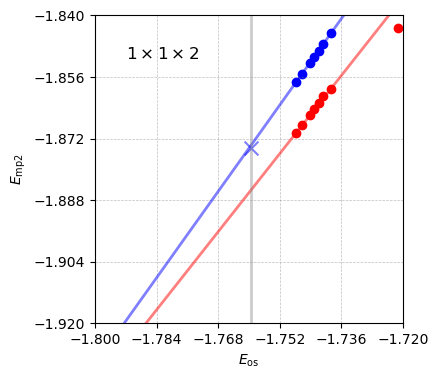

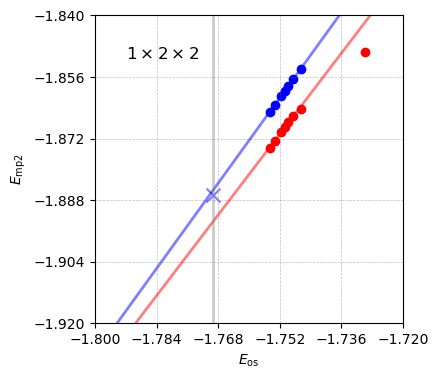

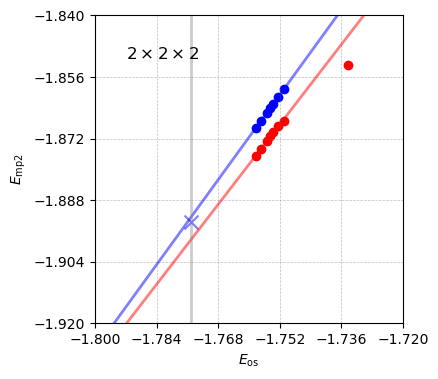

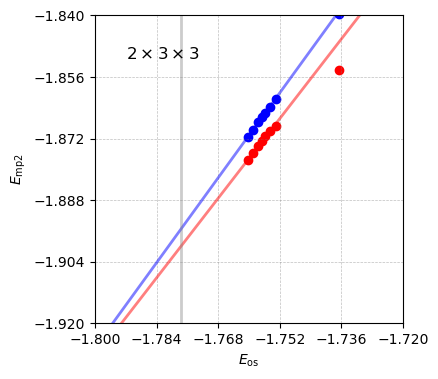

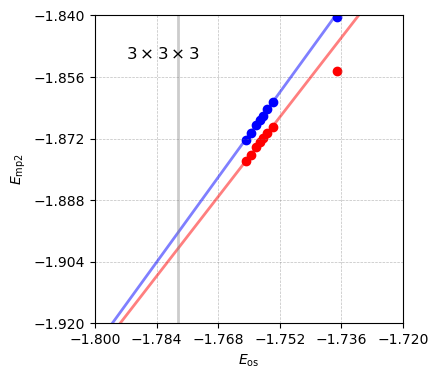

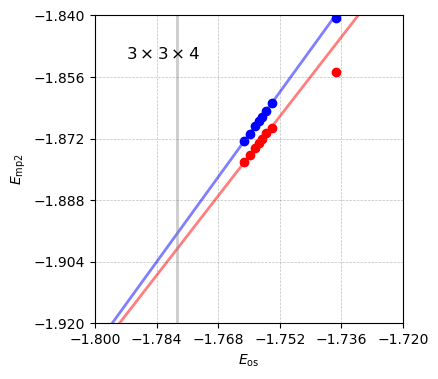

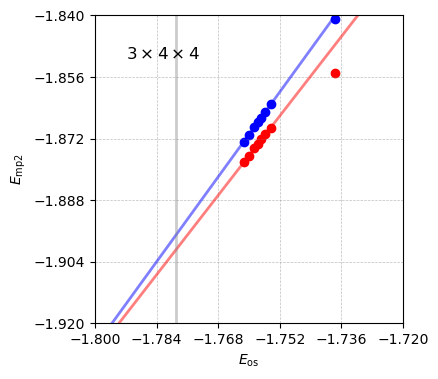

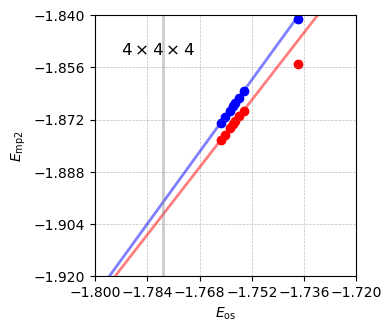

In [67]:
d = None
with open('../data/co2-klno.json', 'r') as f:
    d = json.load(f)

nx = 3
ny = 5


l = ["1-1-2", "1-2-2", "2-2-2", "2-3-3", "3-3-3"]
l += ["3-3-4", "3-4-4", "4-4-4", "4-5-5", "5-5-5"]
l += ["5-5-6", "5-6-6", "6-6-6"]

np = 1
# for ik, k1 in enumerate(sorted([k for k, v in data.items()])):

for ik, k1 in enumerate(l):
    v1 = data.get(k1, None)
    if v1 is None:
        continue

    kk = [k for k, v in d.items() if k1 + "/fftisdf-140-14" in k]
    
    xx = [d[k]['ene_klno_corr_os']   for k in kk if 'ene_klno_corr_os' in d[k]]
    yy = [d[k]['ene_klno_corr_mp2']  for k in kk if 'ene_klno_corr_os' in d[k]]
    zz = [d[k]['ene_klno_corr_ccsd'] for k in kk if 'ene_klno_corr_os' in d[k]]

    assert len(xx) == len(yy) == len(zz)

    # coeff = 2.110590, intercept = 0.125943
    fsos = lambda x: 1.3 * x # 2.110590 * x + 0.125943

    xx = fsos(numpy.array(xx))
    yy = numpy.array(yy)
    zz = numpy.array(zz)

    ene_mp2_sol = numpy.nan
    ene_mp2_ref = numpy.nan
    ene_ccsd_sol = numpy.nan
    ene_ccsd_ref = numpy.nan
    ene_sos_mp2 = fsos(v1['ene_os'])

    if len(xx) > 0:
        # ax = axs[ik % nx, ik // nx]
        fig, ax = plt.subplots(1, 1, figsize=(4, 4), sharex=True, sharey=True)

        # fit xx and yy
        x = numpy.array(xx)
        y = numpy.array(yy)
        ix = numpy.argsort(x)


        x = x[ix][:4]
        y = y[ix][:4]

        r = numpy.polyfit(x, y, np)
        poly = numpy.poly1d(r)

        ax.scatter(xx, yy, label='MP2', color='blue')

        z = numpy.linspace(-4, 0.0, 100)
        ax.plot(z, poly(z), color='blue', label='MP2 fit', linewidth=2, alpha=0.5)


        ene_mp2_sol = poly(fsos(v1['ene_os']))
        ene_mp2_ref = v1['ene_corr_mp2']
        
        err = ene_mp2_sol - ene_mp2_ref
        ax.scatter(fsos(v1['ene_os']), ene_mp2_ref, label='MP2 ref', color='blue', marker='x', s=100, alpha=0.5)

        x = numpy.array(xx)
        y = numpy.array(zz)
        ix = numpy.argsort(x)
        x = x[ix][:2]
        y = y[ix][:2]

        r = numpy.polyfit(x, y, np)
        poly = numpy.poly1d(r)

        ax.scatter(xx, zz, label='CCSD', color='red')
        ax.plot(z, poly(z), color='red', label='CCSD fit', linewidth=2, alpha=0.5)
        ene_ccsd_sol = poly(fsos(v1['ene_os']))
        # ax.scatter(v1['ene_os'] * 1.3, ene_ccsd_sol, label='CCSD', color='red', marker='x')
        ene_ccsd_ref = v1['ene_corr_ccsd']
        ax.scatter(fsos(v1['ene_os']), ene_ccsd_ref, label='CCSD ref', color='red', marker='x')

        ax.vlines(fsos(v1['ene_os']), -2, 0.0, color='grey', linestyle='-', linewidth=2, alpha=0.4)


        ax.grid(
            color='grey',
            linestyle='--',
            linewidth=0.5,
            alpha=0.5
        )

        xmin = -1.80; xmax = -1.72; ymin = -1.92; ymax = -1.84
        ax.set_xlim(xmin, xmax)
        ax.set_xticks(numpy.linspace(xmin, xmax, 6))
        ax.set_ylim(ymin, ymax)
        ax.set_yticks(numpy.linspace(ymin, ymax, 6))
        ax.set_aspect('equal')

        ax.set_xlabel(r"$E_{\mathrm{os}}$")
        ax.set_ylabel(r"$E_{\mathrm{mp2}}$")

        ax.text(0.1, 0.9, r"$%s$" % (k1.replace("-", r"\times")), transform=ax.transAxes, ha='left', va='top', fontsize=12)

    nk = numpy.prod(numpy.array([int(k) for k in k1.split("-")]))
    ene_krhf_tot = data[k1]['ene_krhf']
    ene_kmp2_tot_ref = data[k1]['ene_kmp2']
    ene_kmp2_tot_sol = ene_krhf_tot + ene_mp2_sol
    ene_ccsd_tot = ene_krhf_tot + ene_ccsd_sol
    ene_sos_mp2_tot = ene_krhf_tot + fsos(v1['ene_os'])
    
    out = "nk = %3d, ene_krhf = % 12.8f, ene_sos_mp2 = % 12.8f, " % (nk, ene_krhf_tot, ene_sos_mp2_tot)
    out += "ene_corr_mp2 = % 12.8f, " % (ene_kmp2_tot_sol - ene_krhf_tot)
    out += "ene_corr_ccsd = % 12.8f" % (ene_ccsd_tot - ene_krhf_tot)

    ene_kccsd_ref = data[k1]['ene_kccsd']
    ene_corr_ccsd_ref = data[k1]['ene_corr_ccsd']
    # # print(data[k1])
    if ene_mp2_ref is not numpy.nan:
        out += ", ene_mp2 = % 12.8f" % (ene_mp2_ref)

        ene_corr_mp2_sol = ene_kmp2_tot_sol - ene_krhf_tot
        ene_corr_mp2_ref = ene_mp2_ref
        err = ene_corr_mp2_ref - ene_corr_mp2_sol
        out += ", err = % 6.4e" % (err / 12)

    # if ene_ccsd_ref is not numpy.nan:
    #     out += ", ene_corr_ccsd = % 12.8f" % (ene_corr_ccsd_ref)
    print(out)

fig.tight_layout()

[  -0.18413389 -148.05426247]
[ 0.03736151 -1.77973599]
[ 0.04509594 -1.89797718]
[ 0.02696495 -1.90239579]
[-148.14659542 -148.10062138 -148.0778358  -148.06442375 -148.06113188
 -148.05941384 -148.0581352  -148.05718344 -148.05611033 -148.05573375
 -148.0554689  -148.05524978 -148.05506876]
[-1.75961846 -1.76948369 -1.77507347 -1.77764751 -1.77836454 -1.77870482
 -1.77896221 -1.77915629 -1.77936171 -1.77943565 -1.77948388 -1.77952407
 -1.7795577 ]


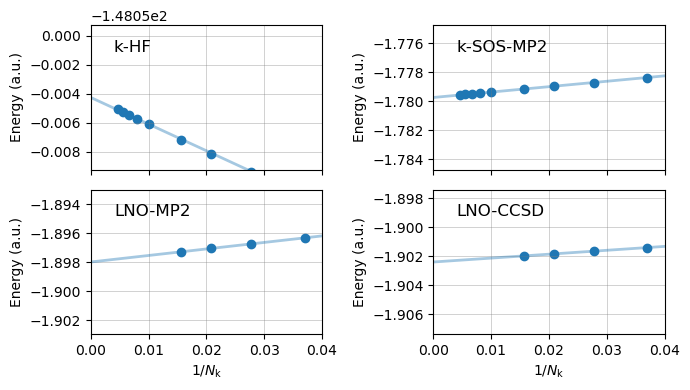

In [68]:
data = """
nk =   2, ene_krhf = -148.14659542, ene_sos_mp2 = -149.90621388, ene_mp2 = -150.02054041, ene_ccsd = -150.03279380
nk =   4, ene_krhf = -148.10062138, ene_sos_mp2 = -149.87010507, ene_mp2 = -149.98623709, ene_ccsd = -149.99472832
nk =   8, ene_krhf = -148.07783580, ene_sos_mp2 = -149.85290927, ene_mp2 = -149.97025909, ene_ccsd = -149.97700510
nk =  18, ene_krhf = -148.06442375, ene_sos_mp2 = -149.84207126, ene_mp2 = -149.95988625, ene_ccsd = -149.96531388
nk =  27, ene_krhf = -148.06113188, ene_sos_mp2 = -149.83949642, ene_mp2 = -149.95745534, ene_ccsd = -149.96254346
nk =  36, ene_krhf = -148.05941384, ene_sos_mp2 = -149.83811866, ene_mp2 = -149.95614149, ene_ccsd = -149.96106188
nk =  48, ene_krhf = -148.05813520, ene_sos_mp2 = -149.83709741, ene_mp2 = -149.95516944, ene_ccsd = -149.95996495
nk =  64, ene_krhf = -148.05718344, ene_sos_mp2 = -149.83633973, ene_mp2 = -149.95444916, ene_ccsd = -149.95915400
nk = 100, ene_krhf = -148.05611033, ene_sos_mp2 = -149.83547204, ene_mp2 =          nan, ene_ccsd =          nan
nk = 125, ene_krhf = -148.05573375, ene_sos_mp2 = -149.83516940, ene_mp2 =          nan, ene_ccsd =          nan
nk = 150, ene_krhf = -148.05546890, ene_sos_mp2 = -149.83495278, ene_mp2 =          nan, ene_ccsd =          nan
nk = 180, ene_krhf = -148.05524978, ene_sos_mp2 = -149.83477385, ene_mp2 =          nan, ene_ccsd =          nan
nk = 216, ene_krhf = -148.05506876, ene_sos_mp2 = -149.83462646, ene_mp2 =          nan, ene_ccsd =          nan
"""

data = data.split("\n")
data = [d.split() for d in data if len(d) > 1]
nk = [int(d[2][:-1]) for d in data]
ene_krhf    = numpy.array([float(d[5][:-1]) for d in data]) 
ene_sos_mp2 = numpy.array([float(d[8][:-1]) for d in data])
ene_mp2     = numpy.array([float(d[11][:-1]) for d in data])
ene_ccsd    = numpy.array([float(d[14]) for d in data])

ix = [-1, -2, -3, -4, -5, -6, -7, -8, -9, -10]
z = numpy.linspace(0, 1.0, 100)
nk = numpy.array(nk)
x = 1 / nk

fig, axs = plt.subplots(2, 2, figsize=(7, 4), sharex=True)

ax = axs[0, 0]
y = numpy.array(ene_krhf)
r = numpy.polyfit(x[ix], y[ix], 1)
print(r)
poly = numpy.poly1d(r)
ax.plot(z, poly(z), label='HF fit', linewidth=2, alpha=0.4)
ax.scatter(x, y, label='HF')
ax.set_ylim(r[1] - 5e-3, r[1] + 5e-3)
ax.text(0.1, 0.9, "k-HF", transform=ax.transAxes, ha='left', va='top', fontsize=12)
ax.grid(
    color='grey',
    linestyle='-',
    linewidth=0.5,
    alpha=0.5
)
ax.set_ylabel("Energy (a.u.)")

ax = axs[0, 1]
y = numpy.array(ene_sos_mp2 - ene_krhf)
r = numpy.polyfit(x[ix], y[ix], 1)
print(r)
poly = numpy.poly1d(r)
ax.plot(z, poly(z), label='MP2 fit', linewidth=2, alpha=0.4)
ax.scatter(x, y, label='MP2')
ax.set_ylim(r[1] - 5e-3, r[1] + 5e-3)
ax.text(0.1, 0.9, "k-SOS-MP2", transform=ax.transAxes, ha='left', va='top', fontsize=12)
ax.grid(
    color='grey',
    linestyle='-',
    linewidth=0.5,
    alpha=0.5
)
ax.set_ylabel("Energy (a.u.)")

ax = axs[1, 0]
y = numpy.array(ene_mp2 - ene_krhf)
xy = [(x[i], y[i]) for i in ix if not numpy.isnan(x[i]) and not numpy.isnan(y[i])]
xy = numpy.array(xy)
r = numpy.polyfit(xy[:, 0], xy[:, 1], 1)
print(r)

poly = numpy.poly1d(r)
ax.plot(z, poly(z), label='MP2 fit', linewidth=2, alpha=0.4)
ax.scatter(x, y, label='MP2')
ax.set_ylim(r[1] - 5e-3, r[1] + 5e-3)
ax.text(0.1, 0.9, "LNO-MP2", transform=ax.transAxes, ha='left', va='top', fontsize=12)
ax.grid(
    color='grey',
    linestyle='-',
    linewidth=0.5,
    alpha=0.5
)
ax.set_ylabel("Energy (a.u.)")
ax.set_xlabel(r"$1 / N_{\mathrm{k}}$")

ax = axs[1, 1]
y = numpy.array(ene_ccsd - ene_krhf)
xy = [(x[i], y[i]) for i in ix if not numpy.isnan(x[i]) and not numpy.isnan(y[i])]
xy = numpy.array(xy)
r = numpy.polyfit(xy[:, 0], xy[:, 1], 1)
print(r)

poly = numpy.poly1d(r)
ax.plot(z, poly(z), label='CCSD fit', linewidth=2, alpha=0.4)
ax.scatter(x, y, label='CCSD')
ax.set_ylim(r[1] - 5e-3, r[1] + 5e-3)
ax.text(0.1, 0.9, "LNO-CCSD", transform=ax.transAxes, ha='left', va='top', fontsize=12)
ax.grid(
    color='grey',
    linestyle='-',
    linewidth=0.5,
    alpha=0.5
)
ax.set_ylabel("Energy (a.u.)")
ax.set_xlabel(r"$1 / N_{\mathrm{k}}$")

# ax.set_ylim(-5.7, -5.5)
ax.set_xlim(0.0, 0.04)

fig.tight_layout()

print(ene_krhf)
print(ene_sos_mp2 - ene_krhf)